This notebook provides an example code for using the IGA2D class

In [4]:
from IGA import IGA2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Assign knot vectors, control points, and weights
knot_vector1 = [0, 0, 1, 2, 3, 3]
knot_vector2 = [0, 0, 1, 2, 2]
control_points = np.array([[[0,0],[1,0],[2,0],[3,0]],[[0,1],[1,1],[2,1],[3,1]],[[0,2],[1,2],[2,2],[3,2]]], dtype=np.double)
weights = np.ones_like(control_points[:,:,0])

#Instantiate the problem
iga = IGA2D(knot_vector1, 1, knot_vector2, 1, control_points, weights)

#Assemble stiffness matrix
iga.assemble()

#Create a boundary condition node set and values for the top side
ns1 = np.array([8, 9, 10, 11], dtype=np.int64)
val1 = np.cos(np.pi * np.array([0., 1., 2., 3.]) / 6.) * 100

#Create a boundary condition node set for the right side
ns2 = np.array([3, 7, 11], dtype=np.int64)
val2 = np.zeros(len(ns2))

#Apply boundary conditions
iga.apply_bcs(ns1,val1)
iga.apply_bcs(ns2,val2)

#Solve
iga.solve()

#Show solution
iga.get_solution()

array([  61.28417886,   53.07365574,   30.64208943,    0.        ,
         70.29995898,   60.88155036,   35.14997949,    0.        ,
        100.        ,   86.60254038,   50.        ,    0.        ])

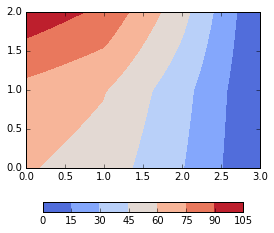

In [6]:
#Plot
iga.plot_solution()

We can compare this result to the finite element example result [here](http://nbviewer.ipython.org/github/johnfoster-pge-utexas/PGE383-AdvGeomechanics/blob/master/files/assignment5_solution.ipynb)